In [1]:
import bct
from sklearn.manifold import TSNE

import plotting

def visualise_clustering(clusters, norm_vars, name):
    print(clusters.shape, norm_vars.shape)
    tsne = TSNE(
            n_components=2,
            perplexity=5,
            learning_rate=200,
            random_state=42,
        )
    tsne_results = tsne.fit_transform(norm_vars.T)
    print("TSNE results shape:", tsne_results.shape)

    plotting.visualise_tsne([clusters], tsne_results, name)

In [ ]:
import plotting
import activations
import modcog_gen

def get_clusters(vars):
    vars_filtered = activations.filter_inactive_nodes(vars, threshold=1e-3)
    vars_norm = activations.normalize_variances_across_nodes(vars_filtered)
    clusters, silhouette_scores, cluster_list, optimal_k = activations.calculate_optimal_clusters(vars_norm)
    return clusters, silhouette_scores, cluster_list, optimal_k, vars_norm

def plot_clusters(clusters, silhouette_scores, cluster_list, optimal_k, vars_norm, envs, range=False, model_dir=None):
    plotting.visualise_cluster_score(silhouette_scores, optimal_k, subdir=model_dir)
    labels, vars = activations.sort_clusters(clusters, vars_norm)
    if range:
        cluster_indices = [optimal_k-2, 3, 8, 13]
        labels_list = []
        variances = []
        names = []
        for ix in cluster_indices:
            cluster = cluster_list[ix]
            labels, vars = activations.sort_clusters(cluster, vars_norm)
            labels_list.append(labels)
            variances.append(vars)
            if ix == optimal_k-2:
                names.append(f"Optimal clusters ({optimal_k})")
                continue
            names.append(f"{ix+2} clusters")
        plotting.visualise_task_variances(labels_list, names, variances, envs, subdir=model_dir)
    else:
        plotting.visualise_task_variances([labels], [f"Optimal ({optimal_k}) clusters"], [vars], envs, subdir=model_dir)

In [118]:
import numpy as np
import os
model_dir = "modcog/seRNNs_single_20"
vars = np.load(os.path.join("data", model_dir, "modcog_vars.npy"))
clusters, silhouette_scores, cluster_list, optimal_k, vars_norm = get_clusters(vars)

In [114]:
import numpy as np
import os
model_dir = "task20/L1_single"
vars = np.load(os.path.join("data", model_dir, "vars.npy"))
clusters, silhouette_scores, cluster_list, optimal_k, vars_norm = get_clusters(vars.T)

Optimal number of clusters: 4
Silhouette scores: [0.30438343, 0.32681572, 0.35202348, 0.3019385, 0.28164288, 0.26888064, 0.27883512, 0.25499678, 0.24895933, 0.2565871, 0.26542422, 0.2703948, 0.26316857, 0.2812562, 0.26008928, 0.27066964, 0.26154703, 0.2823679, 0.2873625, 0.26061502, 0.27893782, 0.2754384, 0.24789196, 0.2459701, 0.26226905, 0.26025057, 0.24439597, 0.24091782]
Saved silhouette score plot to plots/modcog/seRNNs_single_20/cluster_score.pdf


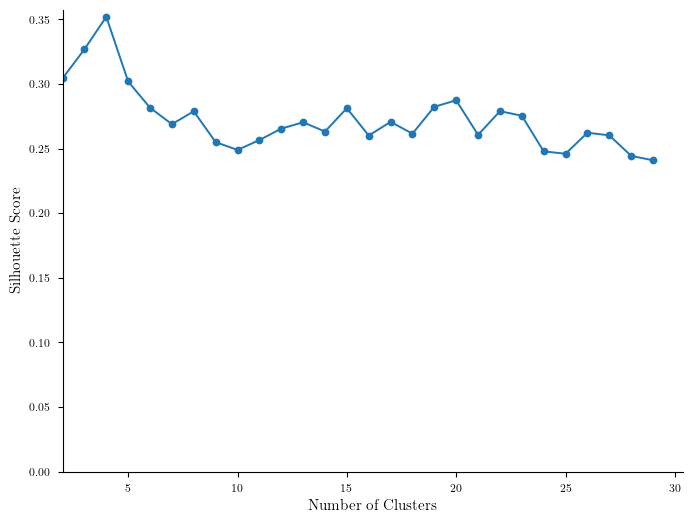

Number of clusters: 4
Number of clusters: 5
Number of clusters: 10
Number of clusters: 15


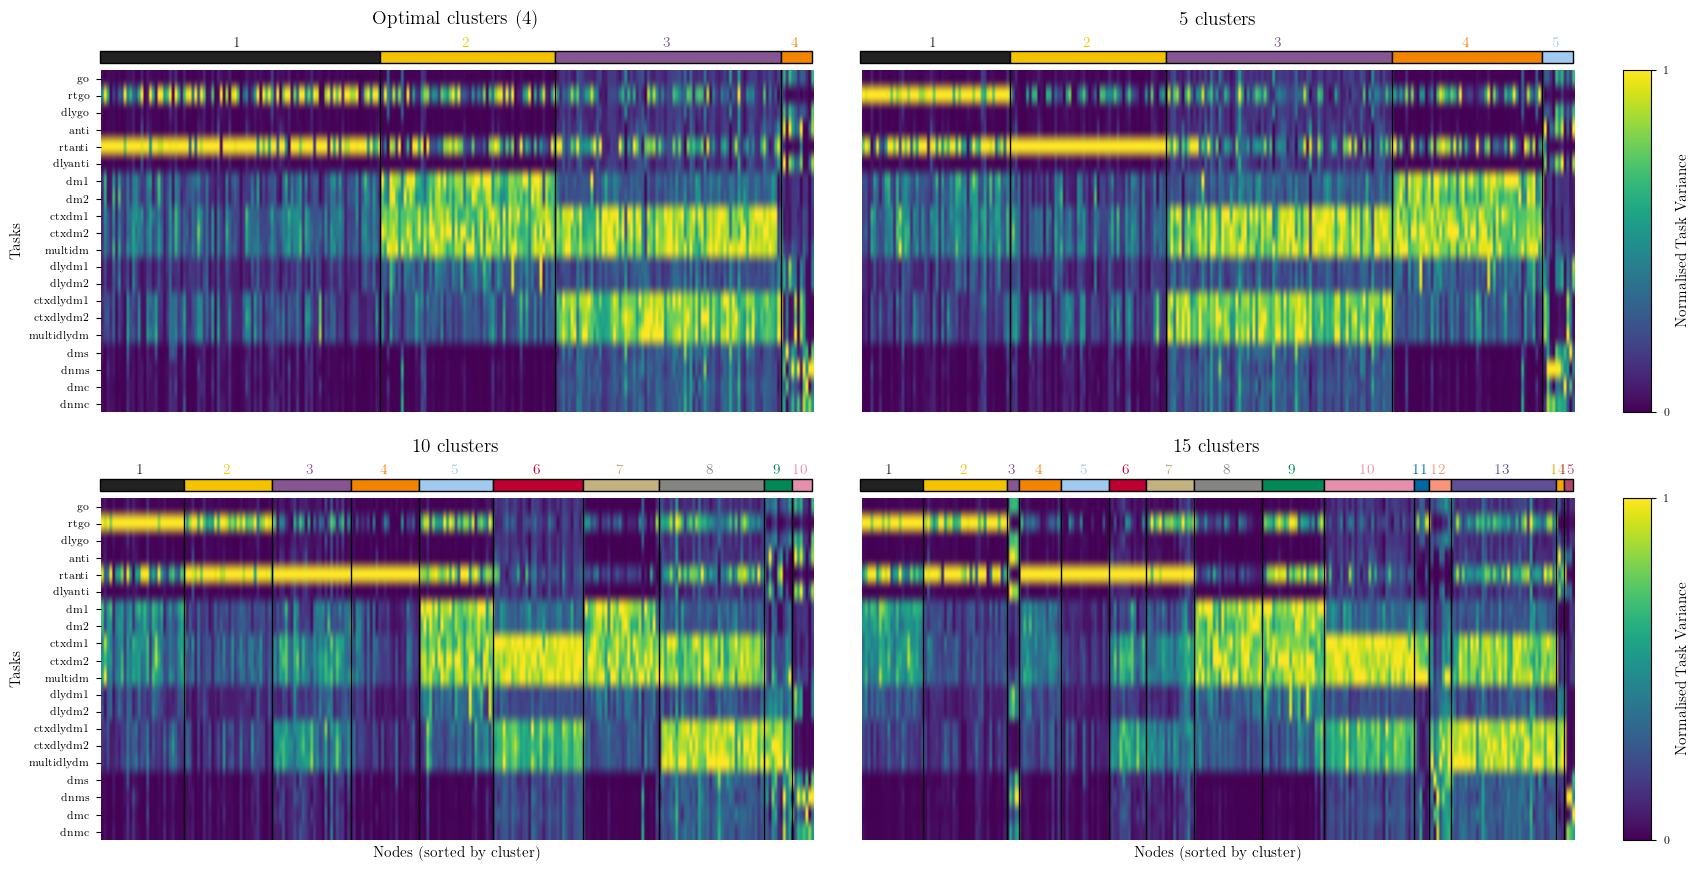

In [119]:
# envs = list(modcog_gen.original_envs.keys()) + list(modcog_gen.seq_envs.keys())
envs = list(modcog_gen.original_envs.keys())
plot_clusters(clusters, silhouette_scores, cluster_list, optimal_k, vars_norm, envs, model_dir=model_dir, range=True)